# Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. In the following plot you can see an example: naive Bayes roughly converges to a low score.

* http://scikit-learn.org/0.17/modules/learning_curve.html
* http://scikit-learn.org/0.17/auto_examples/model_selection/plot_learning_curve.html

In [ ]:
# ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']TkAgg
%matplotlib inline

In [ ]:
import numpy as np
# Dataset
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
# Estimators
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Plotting
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
print digits.keys()

In [ ]:
print digits['DESCR']

In [ ]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimator = GaussianNB()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, '-o', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean,  '-o', color='g', label='Cross-validation score')
plt.legend(loc='best')

We will probably have to use an estimator or a parametrization of the current estimator that can learn more complex concepts (i.e. has a lower bias). If the training score is much greater than the validation score for the maximum number of training samples, adding more training samples will most likely increase generalization. In the following plot you can see that the SVM could benefit from more training examples.

***

In [ ]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(digits.data.shape[0], n_iter=10,
                  test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, '-o', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean,  '-o', color='g', label='Cross-validation score')
plt.legend(loc='best')

# Validation Curves
To validate a model we need a scoring function (see Model evaluation: quantifying the quality of predictions), for example accuracy for classifiers.

The proper way of choosing multiple hyperparameters of an estimator are of course grid search or similar methods (see Grid Search: Searching for estimator parameters) that select the hyperparameter with the maximum score on a validation set or multiple validation sets.

Note that if we optimized the hyperparameters based on a validation score the validation score is biased and not a good estimate of the generalization any longer.

To get a proper estimate of the generalization we have to compute the score on another test set.

However, it is sometimes helpful to plot the influence of a single hyperparameter on the training score and the validation score to find out whether the estimator is overfitting or underfitting for some hyperparameter values.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")

plt.ylim(0.0, 1.1)

plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")
plt.show()

***

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.learning_curve import validation_curve as vc

In [2]:
# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [3]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, prices, random_state=98551, test_size=0.2)

In [20]:
cv = ShuffleSplit(x_train.shape[0], n_iter=80, test_size=0.2, random_state=0)

In [21]:
max_depth = np.arange(1,81)
max_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [22]:
train_scores, test_scores = vc(DecisionTreeRegressor(), x_train, y_train,
                               param_name = "max_depth", param_range=max_depth, cv=cv, scoring="r2")

In [23]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [18]:
import matplotlib.pyplot as pl

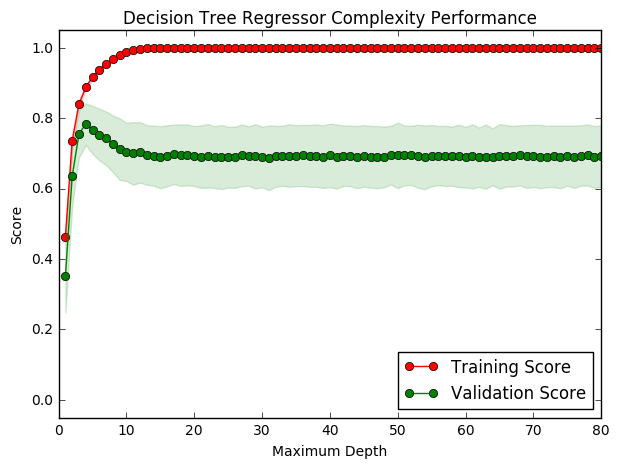

In [24]:
# Plot the validation curve
pl.figure(figsize=(7, 5))
pl.title('Decision Tree Regressor Complexity Performance')
pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')

pl.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
pl.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Visual aesthetics
pl.legend(loc = 'lower right')
pl.xlabel('Maximum Depth')
pl.ylabel('Score')
pl.ylim([-0.05,1.05])
pl.show()